In [1]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\nikitas\\Anaconda3\\lib\\ntpath.py'>

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
from wordcloud import WordCloud
from collections import Counter

import matplotlib.pyplot as plt

%matplotlib inline

def isNaN(num):
    return num != num

def most_common(lst):
    return max(set(lst), key=lst.count)

data = pd.read_csv(r'train.csv')

ids = list(data.list_id)
unique_ids = []
unique_ids_indexes =[]
#find the unique ids
for x in range(len(ids)): 
    if ids[x] not in unique_ids:
        unique_ids.append(ids[x])
        unique_ids_indexes.append(x)

# 1.1 What is the most common type of room_type for your data?


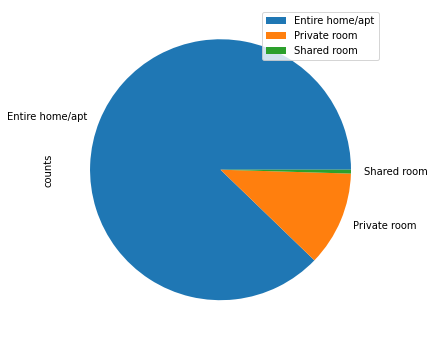

In [3]:
#1.1

rooms = list(data.Room_type)
needed_rooms = []

#create room list
for y in range(len(unique_ids_indexes)):
    needed_rooms.append(rooms[unique_ids_indexes[y]])

df = pd.DataFrame({"room_type":needed_rooms})
results = df["room_type"].value_counts()
unique_rooms = results.index.tolist()
counts = results.tolist()
pie = pd.DataFrame({"counts":counts}, 
                   index=unique_rooms)

plot = pie.plot.pie(y='counts', figsize=(6, 6))

# 1.2 Make a graph or graphs that show the movement of prices during these months.


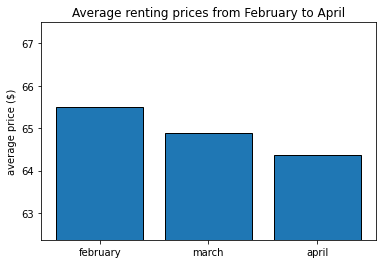

In [4]:
#1.2
prices = list(data.Log_price)
months = list(data.month)

feb_count = months.count('february')
mar_count = months.count('march')
apr_count = months.count('april')
feb_total = 0
mar_total = 0
apr_total = 0


for i in range(feb_count): 
    prices[i] = prices[i].replace('$', '')
    prices[i] = prices[i].replace('.00', '')
    prices[i] = prices[i].replace(',', '')
    prices[i] = int(prices[i]) 
    feb_total += prices[i] 
feb_av = feb_total/feb_count

for i in range(feb_count, mar_count + feb_count): 
    prices[i] = prices[i].replace('$', '')
    prices[i] = prices[i].replace('.00', '')
    prices[i] = prices[i].replace(',', '')
    prices[i] = int(prices[i]) 
    mar_total += prices[i] 
mar_av = mar_total/mar_count

for i in range(mar_count + feb_count, mar_count + feb_count + apr_count): 
    prices[i] = prices[i].replace('$', '')
    prices[i] = prices[i].replace('.00', '')
    prices[i] = prices[i].replace(',', '')
    prices[i] = int(prices[i]) 
    apr_total += prices[i] 
apr_av = apr_total/apr_count

names = ['february', 'march', 'april']
values = [feb_av, mar_av, apr_av]
plt.title('Average renting prices from February to April')
plt.ylim(min(values)-2, max(values)+2)
plt.bar(names, values, edgecolor='black')
plt.ylabel('average price ($)')
plt.show()

# 1.3 Which are the top 5 neighborhoods with the most reviews?

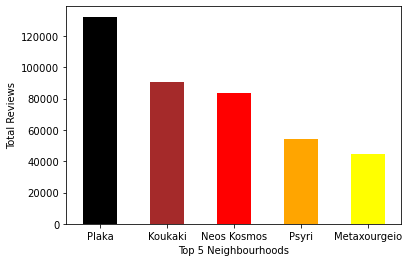

In [5]:
#1.3
neighbourhoods = list(data.Neighbourhood)
for x in range(0, len(neighbourhoods)):
    if isNaN(neighbourhoods[x])!=0:
        neighbourhoods[x] = 'Unknown'
number_of_reviews = list(data.Number_of_reviews)
unique_neighbourhoods = []
total_counts = []
temp = 0
id = 0
#find the unique neighbourhoods
for x in neighbourhoods: 
    if x not in unique_neighbourhoods: 
        unique_neighbourhoods.append(x)
        total_counts.append(0)
                
#get their counts
for a in range(0,len(number_of_reviews)):
    for b in range(0,len(unique_neighbourhoods)):
        if neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += number_of_reviews[a]

#get the 5 biggest counts
top_5_neighbourhoods = []
top_5_counts = []
for a in range(5):
    for b in range(len(total_counts)):
        if temp < total_counts[b]:
            temp = total_counts[b]
            id = b
    top_5_neighbourhoods.append(unique_neighbourhoods[id])
    top_5_counts.append(total_counts[id])
    total_counts[id] = 0
    temp = 0
    id = 0

df = pd.DataFrame({"Top 5 Neighbourhoods":top_5_neighbourhoods,"Total Reviews":top_5_counts})
bars = df.plot.bar(x='Top 5 Neighbourhoods', y='Total Reviews', legend=False, color=['black', 'brown', 'red', 'orange', 'yellow'], rot=0)
plt.ylabel("Total Reviews")
print("")

# 1.4 What is the neighborhood with the most real estate listings?

<ipython-input-6-95df151f1da1>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_apr = plt.axes()


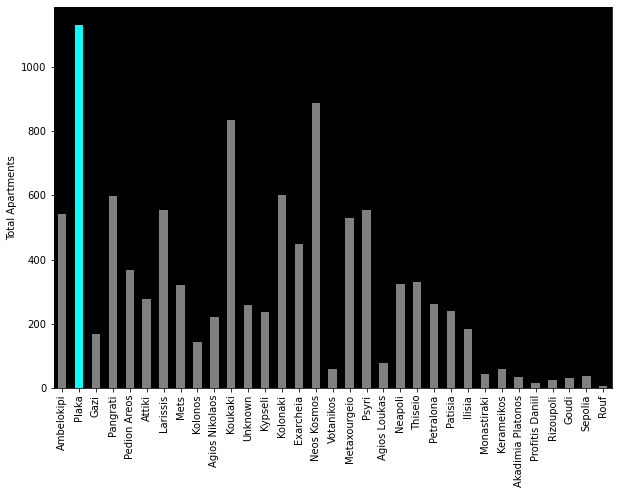

In [6]:
#1.4
#get needed_neighbourhoods
needed_neighbourhoods = []
for x in range(len(unique_ids_indexes)):
    needed_neighbourhoods.append(neighbourhoods[unique_ids_indexes[x]])

#set counts to 0
for x in range(0,len(total_counts)):
    total_counts[x] = 0
#find the unique neighbourhoods
unique_neighbourhoods = []
for x in needed_neighbourhoods: 
    if x not in unique_neighbourhoods: 
        unique_neighbourhoods.append(x)

temp = 0
#get their counts
for a in range(0,len(needed_neighbourhoods)):
    for b in range(0,len(unique_neighbourhoods)):
        if needed_neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += 1
for b in range(len(total_counts)):
    if temp < total_counts[b]:
        temp = total_counts[b]
        id = b
df = pd.DataFrame({"total apartments":total_counts}, 
                   index=unique_neighbourhoods)
colors = ["grey"] * len(total_counts)
#highlight the neighbourhood with the most apartments
colors[total_counts.index(max(total_counts))] = 'cyan'
#plot
plot = df.plot.bar(y='total apartments', figsize=(10, 7), color=colors, legend=False)
ax_apr = plt.axes()
# Setting the background color
ax_apr.set_facecolor("black")
plt.ylabel("Total Apartments")
print("")

# 1.5 How many entries are there per neighborhood and per month?

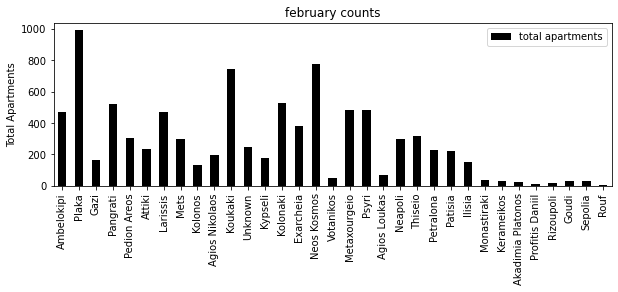

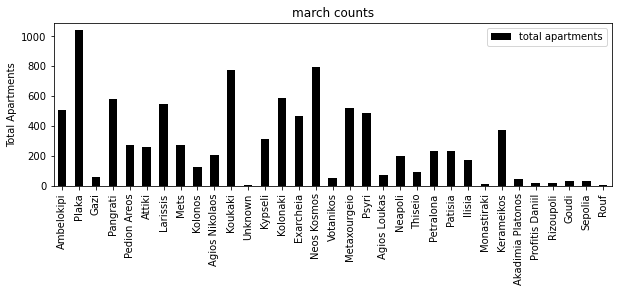

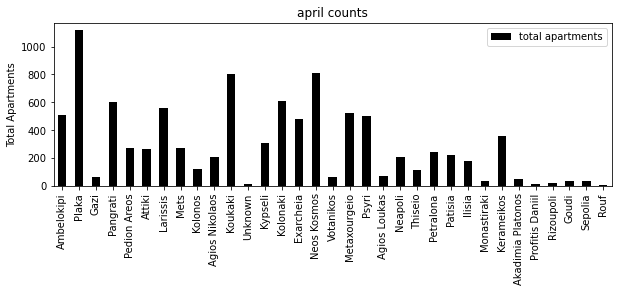

In [7]:
#1.5

#find the unique neighbourhoods
unique_neighbourhoods = []
for x in needed_neighbourhoods: 
    if x not in unique_neighbourhoods: 
        unique_neighbourhoods.append(x)
#february
#set counts to 0
for x in range(0,len(total_counts)):
    total_counts[x] = 0
#get their counts
for a in range(0,feb_count):
    for b in range(0,len(unique_neighbourhoods)):
        if neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += 1

df = pd.DataFrame({"total apartments":total_counts}, 
                   index=unique_neighbourhoods)
colors = ["black"] * len(total_counts)
#plot
plot = df.plot.bar(y='total apartments', figsize=(10, 3), color=colors, title='february counts')

plt.ylabel("Total Apartments")
print("")

#march
#set counts to 0
for x in range(0,len(total_counts)):
    total_counts[x] = 0
#get their counts
for a in range(feb_count,mar_count+feb_count):
    for b in range(0,len(unique_neighbourhoods)):
        if neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += 1

df = pd.DataFrame({"total apartments":total_counts}, 
                   index=unique_neighbourhoods)
colors = ["black"] * len(total_counts)
#plot
plot = df.plot.bar(y='total apartments', figsize=(10, 3), color=colors, title='march counts')
plt.ylabel("Total Apartments")
print("")

#april
#set counts to 0
for x in range(0,len(total_counts)):
    total_counts[x] = 0
#get their counts
for a in range(feb_count+mar_count, feb_count+mar_count+apr_count):
    for b in range(0,len(unique_neighbourhoods)):
        if neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += 1

df = pd.DataFrame({"total apartments":total_counts}, 
                   index=unique_neighbourhoods)
colors = ["black"] * len(total_counts)
#plot
plot = df.plot.bar(y='total apartments', figsize=(10, 3), color=colors, title='april counts')

plt.ylabel("Total Apartments")
print("")

# 1.6 Draw the histogram of the neighborhood variable.

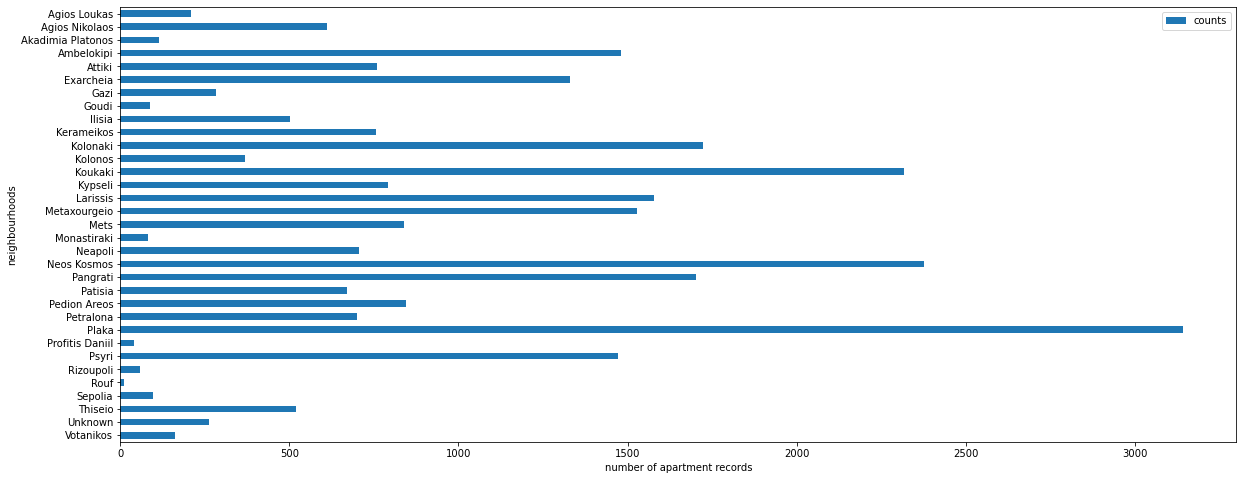

In [8]:
#1.6
neighbourhoods_counts = []

for x in range(len(unique_neighbourhoods)):
    if isNaN(unique_neighbourhoods[x])!=0:
        unique_neighbourhoods[x] = 'Unknown'
unique_neighbourhoods.sort(reverse=True)
for x in range(len(unique_neighbourhoods)):
    neighbourhoods_counts.append(neighbourhoods.count(unique_neighbourhoods[x]))


df = pd.DataFrame({'neighbourhoods':unique_neighbourhoods, 'counts':neighbourhoods_counts})
ax = df.plot.barh(x='neighbourhoods', y='counts', figsize=(20,8), rot=0)
plt.xlabel("number of apartment records")
print("")


# 1.7 What is the most common room_type in each neighborhood?

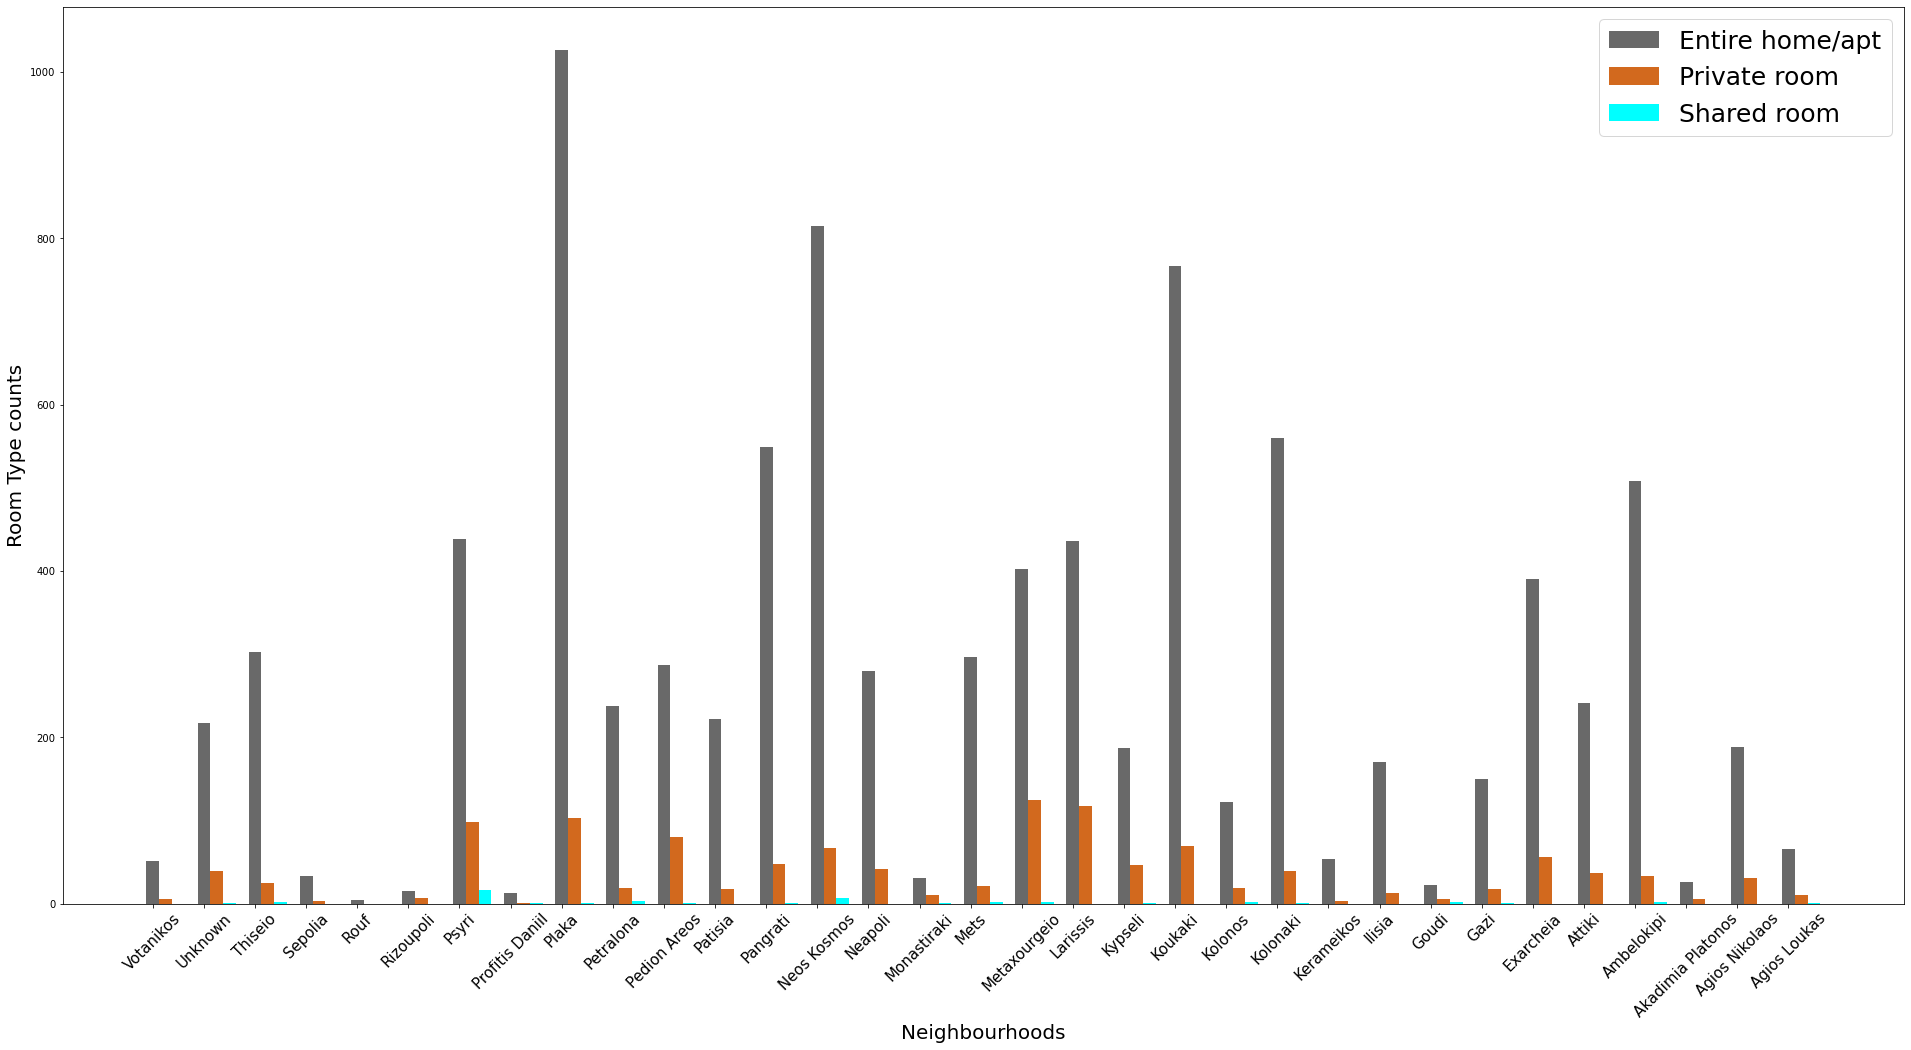

In [9]:
#1.7
#create a list of lists
neighbourhoods_roomtype_lists = [[] for i in range(len(unique_rooms))]
neighbourhoods_roomtype_frequencies = [[0]*len(unique_neighbourhoods) for i in range(len(unique_rooms))]

for x in range(0,len(needed_rooms)):
    for y in range(0,len(unique_rooms)):
        if needed_rooms[x] == unique_rooms[y]:
            neighbourhoods_roomtype_lists[y].append(needed_neighbourhoods[x])

for x in range(0, len(unique_rooms)):
    for y in range(0,len(unique_neighbourhoods)):
        neighbourhoods_roomtype_frequencies[x][y] = neighbourhoods_roomtype_lists[x].count(unique_neighbourhoods[y])        
        
X = np.arange(len(unique_neighbourhoods))

plt.figure(figsize=(len(unique_neighbourhoods),len(unique_neighbourhoods)/2))
plt.bar(X + 0.00, neighbourhoods_roomtype_frequencies[0], color = 'dimgray', width = 0.25)
plt.bar(X + 0.25, neighbourhoods_roomtype_frequencies[1], color = 'chocolate', width = 0.25)
plt.bar(X + 0.50, neighbourhoods_roomtype_frequencies[2], color = 'cyan', width = 0.25)
plt.xticks(np.arange(len(unique_neighbourhoods)), unique_neighbourhoods,size=15)  # Set text labels.
plt.tick_params(axis ='x', rotation = 45) 
plt.xlabel("Neighbourhoods",size =20)
plt.ylabel("Room Type counts",size =20)

plt.legend(unique_rooms,loc = "upper right",prop={'size': 25})


plt.show()

# 1.8 What is the most expensive room type?

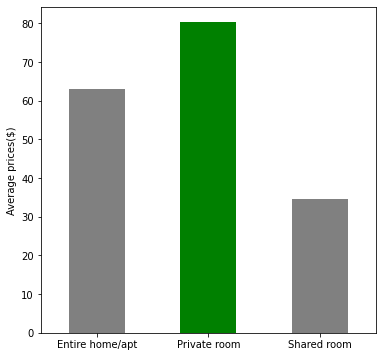

In [10]:
#1.8
unique_room_types = [] 
temp = 0

#find the unique room_types 
for x in rooms: 
    if x not in unique_room_types: 
        unique_room_types.append(x)

unique_room_types_prices_total = [0] * len(unique_room_types) 
unique_room_types_prices_count = [0] * len(unique_room_types) 
unique_room_types_prices_avg = [0] * len(unique_room_types)

for x in range(0,len(rooms)):
    for y in range(0,len(unique_room_types)):
        if rooms[x] == unique_room_types[y]:
            unique_room_types_prices_total[y] += prices[x]
            unique_room_types_prices_count[y] += 1

for x in range(0,len(unique_room_types_prices_avg)): 
    unique_room_types_prices_avg[x] = unique_room_types_prices_total[x]/unique_room_types_prices_count[x] 
    for x in range(0,len(unique_room_types_prices_avg)): 
        if temp < unique_room_types_prices_avg[x]: 
            temp = unique_room_types_prices_avg[x] 
            a = x

df = pd.DataFrame({'Average prices':unique_room_types_prices_avg},index =unique_room_types)

colors = ["gray"] * len(unique_room_types)
#highlight the neighbourhood with the most apartments
colors[unique_room_types_prices_avg.index(max(unique_room_types_prices_avg))] = 'green'
#plot
plot = df.plot.bar(y='Average prices', figsize=(6, 6), color=colors, legend=False)
plt.xticks(rotation=0)
plt.ylabel('Average prices($)')
print("")

# 1.9 Use the Folium Map library with the latitude / longitude columns and display the properties on a map for a month of your choice and in the popups on the map select any other information you want to appear about the property.

In [11]:
#1.9 only using the first 150 records of February, so that the map doesn't get overwhelming
import folium

feb_ids = []
feb_latitudes = []
feb_longitudes = []
feb_room_types = []

ids = list(data.list_id)
latitudes = list(data.Latitude)
longitudes = list(data.Longitude)
room_types = list(data.Room_type)

for x in range(150): 
    feb_ids.append(ids[x])
    feb_latitudes.append(latitudes[x])
    feb_longitudes.append(longitudes[x])
    feb_room_types.append(room_types[x])

df_counters = pd.DataFrame(
    {'ID' : feb_ids,
     'room_type' : feb_room_types,
     'latitude' : feb_latitudes,
     'longitude' : feb_longitudes,
    })
locations = df_counters[['latitude', 'longitude']]
locationlist = locations.values.tolist()
map = folium.Map(location=[df_counters['latitude'].mean(), df_counters['longitude'].mean()], zoom_start=14)
for x in range(0, len(locationlist)):
    info = str(df_counters['ID'][x]) + "\n" + str(df_counters['room_type'][x])
    folium.Marker(locationlist[x], popup=info).add_to(map)
map

# 1.10 Make different wordclouds with the data from the neighborhood neighborhood, transit, description, last_review.

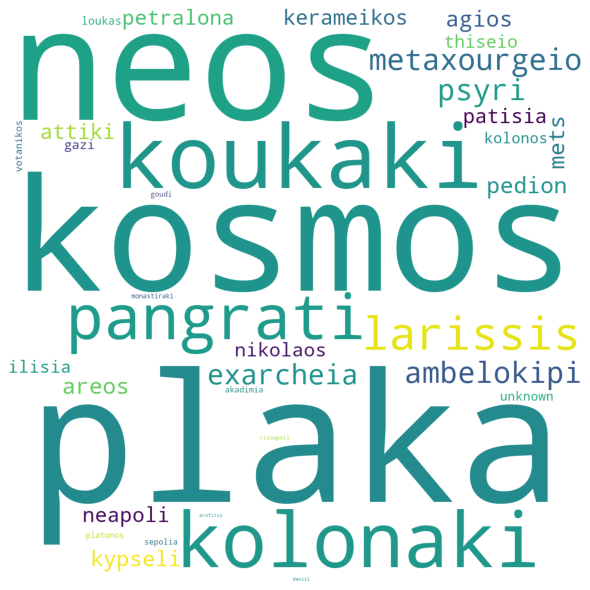

In [12]:
#1.10 neighbourhoods
from wordcloud import WordCloud, STOPWORDS 

df = pd.DataFrame({'neighbourhoods':neighbourhoods})
  
comment_words = '' 
  
# iterate through the csv file 
for val in df.neighbourhoods: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                collocations=False,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

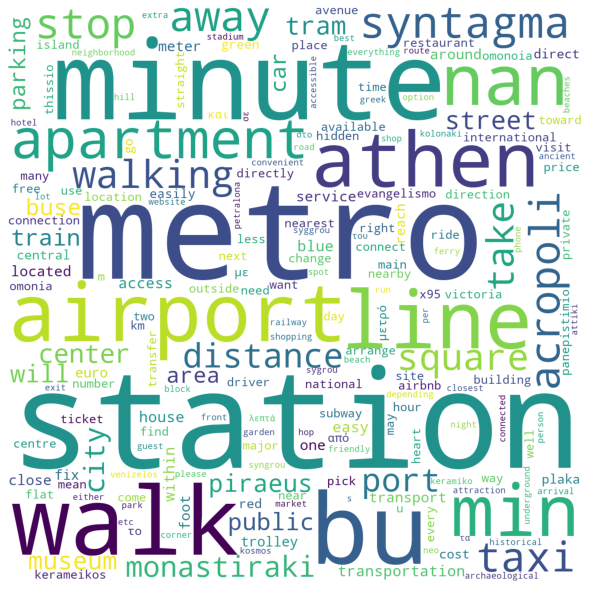

In [13]:
#1.10 transit
from wordcloud import WordCloud, STOPWORDS 

transit = list(data.transit)
df = pd.DataFrame({'transit':transit})
#remove nans
transit = [x for x in transit if str(x) != 'nan']

comment_words = '' 
  
# iterate through the csv file 
for val in df.transit: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                collocations=False,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

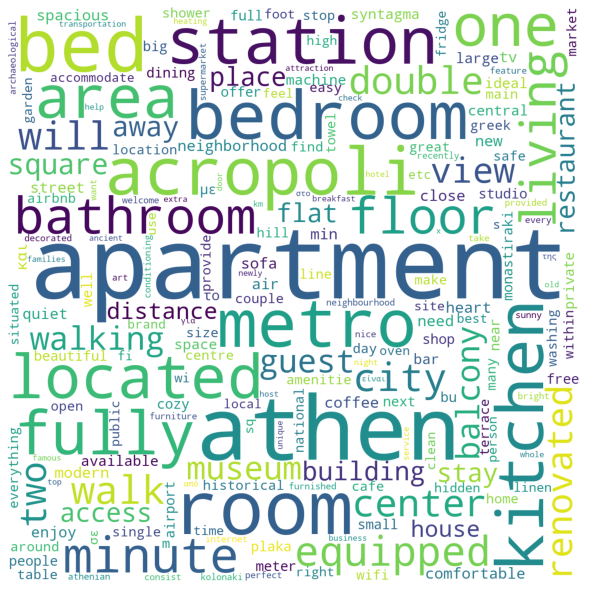

In [14]:
#1.10 description
from wordcloud import WordCloud, STOPWORDS 

descriptions = list(data.Description)
df = pd.DataFrame({'descriptions':descriptions})
df
#remove nans
transit = [x for x in transit if str(x) != 'nan']

comment_words = '' 
  
# iterate through the csv file 
for val in df.descriptions: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                collocations=False,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [15]:
# #1.10 last review     doesn't work :(

# from wordcloud import WordCloud, STOPWORDS 

# last_reviews = list(data.Last_review)

# #remove nans
# last_reviews = [x for x in last_reviews if str(x) != 'nan']

# #create word cldoud
# df = pd.DataFrame({'last_reviews':last_reviews})
  
# comment_words = '' 
  
# # iterate through the csv file 
# for val in df.last_reviews: 
      
#     # typecaste each val to string 
#     val = str(val) 
  
#     # split the value 
#     tokens = val.split()
# #     print(tokens)
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
#     comment_words += " ".join(tokens)+" "
    
# wordcloud = WordCloud(width = 1200, height = 1200, 
#                 background_color ='white', 
#                 collocations=False,
#                 min_font_size = 10).generate(comment_words) 
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# wordcloud.recolor(color_func = grey_color_func)
# plt.show()

# Bonus Questions

# Which is the most expensive neighbourhood?

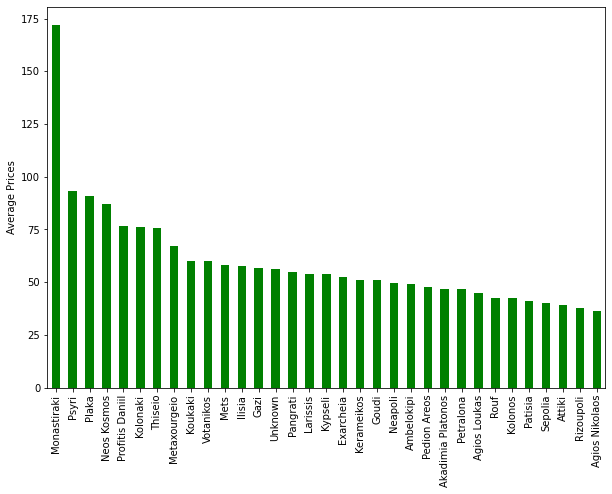

In [16]:
# 1.11 
#get needed_neighbourhoods

#set counts to 0
for x in range(0,len(total_counts)):
    total_counts[x] = 0
total_num = []
total_avg = []

#find the unique neighbourhoods and prepare the matrixes
unique_neighbourhoods = []
for x in needed_neighbourhoods: 
    if x not in unique_neighbourhoods: 
        unique_neighbourhoods.append(x)
        total_num.append(0)
        total_avg.append(0)
#get their counts
for a in range(0,len(needed_neighbourhoods)):
    for b in range(0,len(unique_neighbourhoods)):
        if needed_neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += prices[a]
            total_num[b] += 1
for a in range(len(total_counts)):
    total_avg[a] = total_counts[a]/total_num[a]

df = pd.DataFrame({"average prices":total_avg}, 
                   index=unique_neighbourhoods)

df = df.sort_values(by=["average prices"],ascending=False)
colors = ["green"] * len(total_counts)
#plot
plot = df.plot.bar(y='average prices', figsize=(10, 7), color=colors, legend=False)
# Setting the background color
plt.ylabel("Average Prices")
print("")

# Which neighbourhood has the biggest apartments on sale?

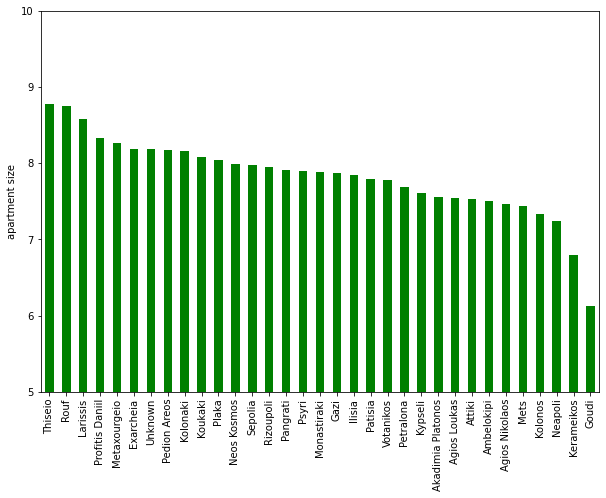

In [17]:
# 1.11 
bedrooms = list(data.Bedrooms)
bathrooms = list(data.Bathrooms)
accommodates = list(data.Accommodates)

for x in range(len(bedrooms)):
    if isNaN(bedrooms[x])!=0:
        bedrooms[x] = 2
    if isNaN(bathrooms[x])!=0:
        bathrooms[x] = 2
    if isNaN(accommodates[x])!=0:
        accommodates[x] = 4

for i in range(len(bedrooms)):
        bedrooms[i] = int(bedrooms[i]) 
        bathrooms[i] = int(bathrooms[i])
        accommodates[i] = int(accommodates[i])

#to determine the size of an apartment we use the only relevant columns, bedrooms, bathrooms and Accommodates, 
#and assume the size is equivalent to bedrooms*2 + bathrooms + Accommodates/3
# set counts to 0
for x in range(0,len(total_counts)):
    total_counts[x] = 0
    total_num[x] = 0
    total_avg[x] = 0

#get their counts
for a in range(0,len(needed_neighbourhoods)):
    for b in range(0,len(unique_neighbourhoods)):
        if needed_neighbourhoods[a] == unique_neighbourhoods[b]:
            total_counts[b] += bedrooms[a]*2 + bathrooms[a] + accommodates[a]
            total_num[b] += 1
            
for x in range(len(total_counts)):
    total_avg[x] = total_counts[x]/total_num[x]

df = pd.DataFrame({"apartment size":total_avg}, 
                   index=unique_neighbourhoods)

df = df.sort_values(by=["apartment size"],ascending=False)
colors = ["green"] * len(total_counts)
#plot
plot = df.plot.bar(y='apartment size', figsize=(10, 7), color=colors, legend=False)
plt.ylim(5, 10)
# Setting the background color
plt.ylabel("apartment size")
print("")

# 2.1

In [18]:
#2.1
# Load library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikitas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Create the list of docs using TfidfVectorizer

In [19]:
#2.1
#create the list of docs

data["Description"].fillna("", inplace = True)
data["Name"].fillna("", inplace = True)

ids = np.array(data.list_id)
names = np.array(data.Name)
descriptions = np.array(data.Description)
result = (np.vstack((names,descriptions)).T).tolist()
#convert the list of lists to a big string
docs = sum(result,[])

#apply stop words
my_stop_words = set(stopwords.words('english')) 
tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = my_stop_words)


tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
tfidf_vectorizer_vectors

<56244x29019 sparse matrix of type '<class 'numpy.float64'>'
	with 2042366 stored elements in Compressed Sparse Row format>

# Create and print the dataframe (sorted by the first column)

In [20]:
#2.1
# get the first vector out (for the first id)
# using the first 2000 entries to avoid overflow

x_vector_tfidfvectorizer = tfidf_vectorizer_vectors[0]

# place the rest tf-idf values in a pandas data frame
df = pd.DataFrame(x_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=[ids[0]])
for x in range(1,2000):
    x_vector_tfidfvectorizer = tfidf_vectorizer_vectors[x]
    df[ids[x]] = x_vector_tfidfvectorizer.T.todense()
df.sort_values(by=[ids[0]],ascending=False)

,10595,10988,10990,10993,10995,27262,28186,31155,33704,38100,...,14286122,14287680,14290029,14294327,14297436,14307925,14308894,14328305,14333096,14355410
2ba,0.580460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96m2,0.549673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3br,0.448543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
etc,0.222676,0.000000,0.000000,0.000000,0.000000,0.000000,0.387133,0.000000,0.000000,0.065833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fi,0.218301,0.124028,0.284687,0.111623,0.302904,0.127169,0.379527,0.117418,0.305156,0.129078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gurgling,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
guns,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gulf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.2 Cosine Similarities Array

In [21]:
#2.2

#find cosine similarities
from sklearn.metrics.pairwise import cosine_similarity
df = df.T
similarity = cosine_similarity(df, df)
similarity

array([[1.        , 0.06258242, 0.14364845, ..., 0.01436323, 0.03076208,
        0.00541166],
       [0.06258242, 1.        , 0.13183057, ..., 0.06682334, 0.03934669,
        0.11000536],
       [0.14364845, 0.13183057, 1.        , ..., 0.01873114, 0.50506302,
        0.0354076 ],
       ...,
       [0.01436323, 0.06682334, 0.01873114, ..., 1.        , 0.10017429,
        0.04014667],
       [0.03076208, 0.03934669, 0.50506302, ..., 0.10017429, 1.        ,
        0.04038783],
       [0.00541166, 0.11000536, 0.0354076 , ..., 0.04014667, 0.04038783,
        1.        ]])

# 2.3 Dictionary

In [22]:
#2.3
#create the dictionary
temp_similarity = np.copy(similarity)
dictionary= {}
dictionary_num_of_entries = 100

max_array = np.zeros((2000, 2000))
for i in range(0,dictionary_num_of_entries):
    temp = 0
    tempx = 0
    tempy = 1
    z = 1
    for x in range(0,1999):
        for y in range(z,2000):
            if(temp_similarity[x][y] > temp and temp_similarity[x][y]<1):
                tempx = x
                tempy = y
                temp = similarity[x][y]
        z+=1
#     print(i,":",temp_similarity[tempx][tempy])
#     print("tempx",tempx,"tempy",tempy,"\n")
    dict_name = [str(tempx), str(tempy)]
    entry = ('-'.join(dict_name)+' similarity')
    dictionary[entry] = similarity[tempx][tempy]
    temp_similarity[tempx][tempy] = 0
print("Dictionary:")
dictionary

Dictionary:


{'513-525 similarity': 0.9947773841660028,
 '523-527 similarity': 0.9936911417513263,
 '1671-1741 similarity': 0.993481021106108,
 '463-519 similarity': 0.9887098392088463,
 '507-1101 similarity': 0.9867074938508793,
 '1113-1851 similarity': 0.9836217452333542,
 '333-529 similarity': 0.9702542719934378,
 '1187-1191 similarity': 0.9644933732981158,
 '823-827 similarity': 0.9643348748258909,
 '1271-1285 similarity': 0.9606491901473586,
 '1183-1191 similarity': 0.9582706502129745,
 '606-730 similarity': 0.9558754499107094,
 '1183-1187 similarity': 0.953308499158153,
 '709-1577 similarity': 0.9524984059314208,
 '1356-1358 similarity': 0.9522052438041586,
 '335-523 similarity': 0.949860316354603,
 '335-527 similarity': 0.9498063781475052,
 '513-533 similarity': 0.9467470229311583,
 '157-1189 similarity': 0.9463339445512486,
 '525-533 similarity': 0.9414875957681925,
 '831-1065 similarity': 0.9387022455849203,
 '463-1975 similarity': 0.9380901130814332,
 '748-1672 similarity': 0.938009185825